In [7]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [8]:
# 构造训练集和测试集，训练时从训练集中划分验证集
# 训练集：4个数据集各取3万条，标签：正常0，Fuzzy1，Dos2，Spoofing3
# 测试集：4个数据集各取1万条
import csv
import os
import math
import numpy as np

train_output_file = open('./multiply_train_final.csv', 'w',newline='')
test_output_file = open('./multiply_test_final.csv', 'w',newline='')
train_writer_file = csv.writer(train_output_file)
test_writer_file = csv.writer(test_output_file)
train_writer_file.writerow(["id","id_num","id_dis","last_id","last_interval","interval",
                         "data0","data1","data2","data3","data4","data5","data6","data7","data_c","data_last","class"])
test_writer_file.writerow(["id","id_num","id_dis","last_id","last_interval","interval",
                         "data0","data1","data2","data3","data4","data5","data6","data7","data_c","data_last","class"])

currentNum=0
trainNum=30000
testNum=10000

print("1.Fuzzy")
with open('Fuzzy3.csv', 'r') as f:
    reader=csv.reader(f)
    for row in reader:
        # 跳过第一行
        if row[0] == 'id':
            continue
        if currentNum < trainNum:
            if row[-1] == 'R':
                train_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T0'])
            else:
                train_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T1']) # Fuzzy:1
        elif currentNum < trainNum + testNum:
            if row[-1] == 'R':
                test_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T0'])
            else:
                test_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T1']) # Fuzzy:1
        else:
            break
        currentNum=currentNum+1
currentNum=0
f.close()

print("2.DoS")
with open('DoS3.csv', 'r') as f:
    reader=csv.reader(f)
    for row in reader:
        # 跳过第一行
        if row[0] == 'id':
            continue
        if currentNum < trainNum:
            if row[-1] == 'R':
                train_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T0'])
            else:
                train_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T2']) # DoS:2
        elif currentNum < trainNum + testNum:
            if row[-1] == 'R':
                test_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T0'])
            else:
                test_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T2']) # DoS:2
        else:
            break
        currentNum=currentNum+1
currentNum=0
f.close()

print("3.SpoofingGEAR")
with open('SpoofingGEAR3.csv', 'r') as f:
    reader=csv.reader(f)
    for row in reader:
        # 跳过第一行
        if row[0] == 'id':
            continue
        if currentNum < trainNum:
            if row[-1] == 'R':
                train_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T0'])
            else:
                train_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T3']) # Spoofing: 3
        elif currentNum < trainNum + testNum:
            if row[-1] == 'R':
                test_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T0'])
            else:
                test_writer_file.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],row[14],row[15],'T3']) # Spoofing: 3
        else:
            break
        currentNum=currentNum+1
currentNum=0
f.close()

train_output_file.close()
test_output_file.close()
print("done")

1.Fuzzy
2.DoS
3.SpoofingGEAR
done


In [18]:
from keras.models import load_model
one_model = load_model('multiply_final.h5')
one_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 256)           278528    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 128)           197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1, 'T2': 2, 'T3': 3}
(80951, 4)
(8951, 4)
(80951, 50, 15)
(8951, 50, 15)
Starting training 
Epoch 1/5
80/80 [==============================] - 135s 2s/step - loss: 0.1110 - accuracy: 0.9085 - val_loss: 0.0195 - val_accuracy: 0.9899
Epoch 2/5
80/80 [==============================] - 136s 2s/step - loss: 0.0224 - accuracy: 0.9851 - val_loss: 0.0264 - val_accuracy: 0.9848
Epoch 3/5
80/80 [==============================] - 136s 2s/step - loss: 0.0087 - accuracy: 0.9945 - val_loss: 0.0051 - val_accuracy: 0.9964
Epoch 4/5
80/80 [==============================] - 137s 2s/step - loss: 0.0044 - accuracy: 0.9973 - val_loss: 0.0011 - val_accuracy: 0.9996
Epoch 5/5
80/80 [==============================] - 137s 2s/step - loss: 0.0040 - accuracy: 0.9975 - val_loss: 0.0025 - val_accuracy: 0.9988


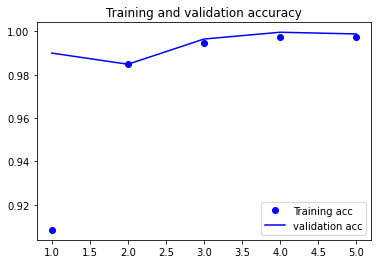

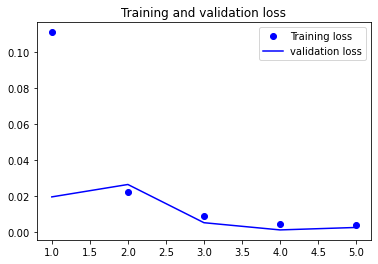


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1, 'T2': 2, 'T3': 3}
(251, 4)
(29651, 4)
(251, 50, 15)
(29651, 50, 15)
测试集上的loss和acc：
[0.0028437261935323477, 0.9986509680747986]
<function confusion_matrix at 0x000001DEF580FC18>


In [13]:
print("\nCAN dataset using Keras/TensorFlow ")
np.random.seed(4)
tf.random.set_seed(13)

def TP(y_true,y_pred):
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    return TP

def TN(y_true,y_pred):
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    return TN

def FP(y_true,y_pred):
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    return FP

def FN(y_true,y_pred):
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    return FN

class LossHistory(K.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

def load_data(CSV_FILE_PATH, size1, size2):
    CAN = pd.read_csv(CSV_FILE_PATH)
    target_var = 'class'  # 目标变量
    # 数据集的特征
    features = list(CAN.columns)
    features.remove(target_var)
    features.remove('id_dis')
    # 目标变量的类别
    Class = CAN[target_var].unique()
    # 目标变量的类别字典
    Class_dict = dict(zip(Class, range(len(Class))))
    # 增加一列target, 将目标变量进行编码
    CAN['target'] = CAN[target_var].apply(lambda x: Class_dict[x])
    # 对目标变量进行0-1编码(One-hot Encoding)
    lb = LabelBinarizer()
    lb.fit(list(Class_dict.values()))
    transformed_labels = lb.transform(CAN['target'])
    y_bin_labels = []  # 对多分类进行0-1编码的变量
    for i in range(transformed_labels.shape[1]):
        y_bin_labels.append('y' + str(i))
        CAN['y' + str(i)] = transformed_labels[:, i]
    # 将数据集分为训练集和验证集
    train_x, val_x, train_y, val_y = train_test_split(CAN[features], CAN[y_bin_labels], \
                                                        train_size=size1, test_size=size2, shuffle=False, random_state=0) # shuffle=True, stratify=None
    print(type(Class_dict))
    print(Class_dict)
    return train_x, val_x, train_y, val_y, Class_dict

file1='multiply_train_final.csv'
file2='multiply_test_final.csv'
model1='multiply_final.h5'
# 1. 读取CSV数据集
print("Loading CAN data into memory")
CSV_FILE_PATH = file1
train_x, val_x, train_y, val_y, Class_dict = load_data(CSV_FILE_PATH, 0.9, 0.1)
#train_x = train_x.values.reshape(train_x.shape[0],1,16)
#val_x = val_x.values.reshape(val_x.shape[0],1,16)
train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                            31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
print(train_y.shape)
val_y=val_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                   train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                       train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                       train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                       train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                       train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                       train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                       train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                       train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                       train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
print(val_y.shape)
train_x = series_to_supervised(train_x, 49)
val_x = series_to_supervised(val_x, 49)
train_x = train_x.values.reshape(train_x.shape[0],50,15)
print(train_x.shape)
val_x = val_x.values.reshape(val_x.shape[0],50,15)
print(val_x.shape)


# 2. 定义模型
init = K.initializers.glorot_uniform(seed=1)
simple_adam = K.optimizers.Adam()
model = K.models.Sequential()
model.add(LSTM(units=256,input_shape=(50, 15),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_initializer=init, activation='linear'))
model.add(Dense(4,activation='softmax'))
#model.add(Activation('tanh'))
#model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
#model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='sigmoid'))
#model.compile(loss='categorical_crossentropy', optimizer=simple_adam, metrics=['accuracy'])'''
#rmsprop = RMSprop(lr=0.01)
#model.compile(loss='mae', optimizer='rmsprop', metrics=['accuracy',TP,TN,FP,FN])
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#print(model.summary())
# 3. 训练模型
b_size = 1024
max_epochs = 5
history = LossHistory()
print("Starting training ")
h = model.fit(train_x, train_y, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))

# 展示训练结果
import matplotlib.pyplot as plt
acc = h.history['accuracy']
loss = h.history['loss']
val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

'''
# 根据验证集最小损失确定迭代轮数，确定并保存模型
print(val_loss)
print(len(val_loss))
min_num = val_loss[0]
min_index = 0
for i in range(len(val_loss)):
    if val_loss[i] < min_num:
        min_num = val_acc[i]
        min_index = i

print(min_num,min_index)
'''

#h = model.fit(train_x, train_y, batch_size=b_size, epochs=min_index+1, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))
model.save(model1)

# 测试，展示测试结果
# 为了和网站匹配及展示的方便，使用刚刚保存的模型
from keras.models import load_model
# 0. 开始
print("\nCAN dataset using Keras/TensorFlow ")
np.random.seed(4)
tf.random.set_seed(13)

# 1. 读取CSV数据集
print("Loading CAN data into memory")
CSV_FILE_PATH = file2
train_x, test_x, train_y, test_y, Class_dict = load_data(CSV_FILE_PATH, 0.01, 0.99)
#train_x = train_x.values.reshape(train_x.shape[0],1,16)
#test_x = test_x.values.reshape(test_x.shape[0],1,16)
train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                            31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
print(train_y.shape)
test_y=test_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                   train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                       train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                       train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                       train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                       train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                       train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                       train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                       train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                       train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
print(test_y.shape)
train_x = series_to_supervised(train_x, 49)
test_x = series_to_supervised(test_x, 49)
train_x = train_x.values.reshape(train_x.shape[0],50,15)
print(train_x.shape)
test_x = test_x.values.reshape(test_x.shape[0],50,15)
print(test_x.shape)


# 加载刚刚保存的模型
final_model = load_model(model1)
# 测试模型的结果
eval2 = final_model.evaluate(test_x, test_y, verbose=0)
print('测试集上的loss和acc：')
print(eval2)

from keras.models import load_model
predictions = final_model.predict(test_x)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))
print(confusion_matrix)

In [15]:
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))

array([[25204,    18,     0,     1],
       [    5,  1221,     0,     0],
       [    5,     0,  1775,     0],
       [   11,     0,     0,  1411]], dtype=int64)

In [16]:
# 加载刚刚保存的模型
final_model = load_model(model1)
# 测试模型的结果
eval2 = final_model.evaluate(test_x, test_y, verbose=0)
print('测试集上的loss和acc：')
print(eval2)

from keras.models import load_model
predictions = final_model.predict(test_x)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))
print(confusion_matrix)

测试集上的loss和acc：
[0.0028437261935323477, 0.9986509680747986]
<function confusion_matrix at 0x000001DEF580FC18>


In [17]:
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))

array([[25204,    18,     0,     1],
       [    5,  1221,     0,     0],
       [    5,     0,  1775,     0],
       [   11,     0,     0,  1411]], dtype=int64)